# Kenya surface dataset

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from iv_utils_daint import *
from ctsm_py.utils import *


set_plot_param()

In [ ]:
inputdir = '/scratch/snx3000/ivanderk/CCLM2_inputdata/surfdata_0.1x0.1_hires/'
filename = 'surfdata_0.1x0.1_hist_16pfts_Irrig_CMIP6_simyr2005_c230523.nc'

In [ ]:
# cut out East Africa

# ncks -d lsmlon,1430,2361 -d lsmlat,1180,1606 surfdata_0.1x0.1_hist_16pfts_Irrig_CMIP6_simyr2005_c230523.nc -O surfdata_0.1x0.1_EUR_hist_16pfts_Irrig_CMIP6_simyr2005_c230523.nc

In [ ]:
high_res_input = xr.open_dataset(inputdir+filename)

In [ ]:
latslice = slice(850,950)
lonslice = slice(2100,2250)
da_eastafrica = high_res_input.sel(lsmlat=latslice, lsmlon=lonslice)

da_eastafrica

landmask = da_eastafrica['LANDFRAC_PFT']>0

In [ ]:
da_eastafrica['MONTHLY_LAI']

In [ ]:
pct_natveg = da_eastafrica['PCT_NATVEG'].where(landmask)

pct_natveg.plot()

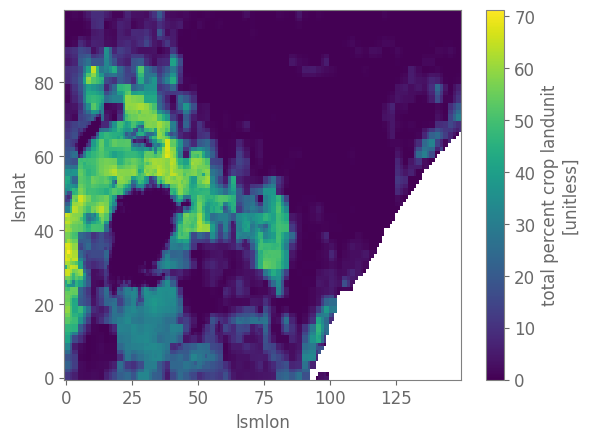

In [56]:
da = da_eastafrica['PCT_CROP'].where(landmask)

da.plot()

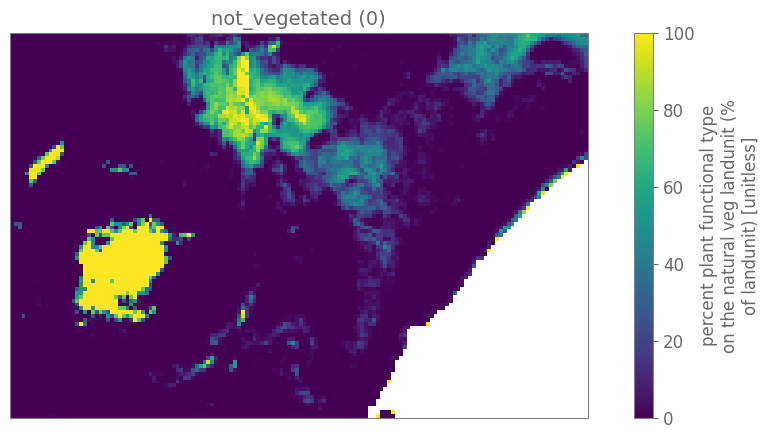

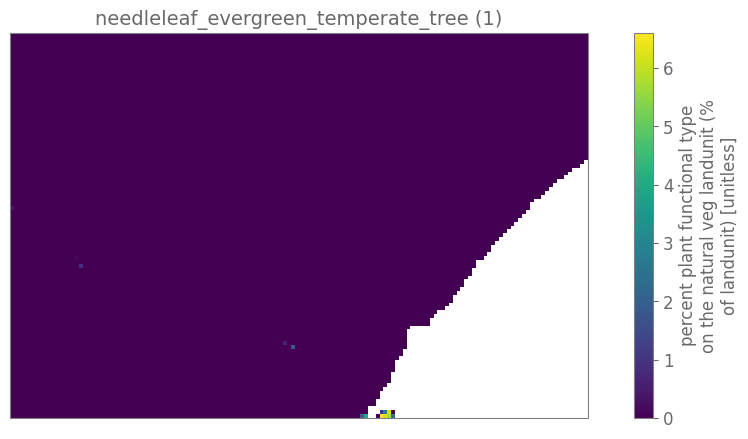

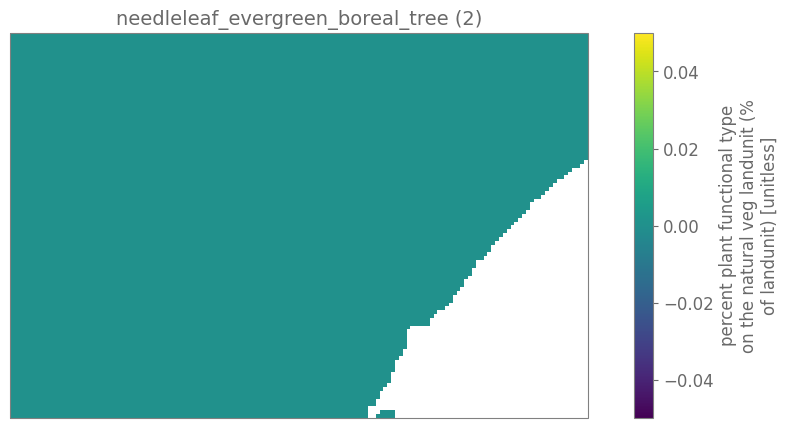

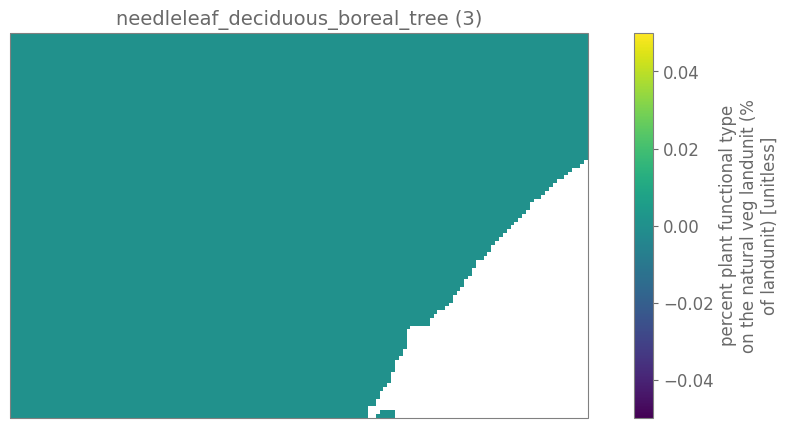

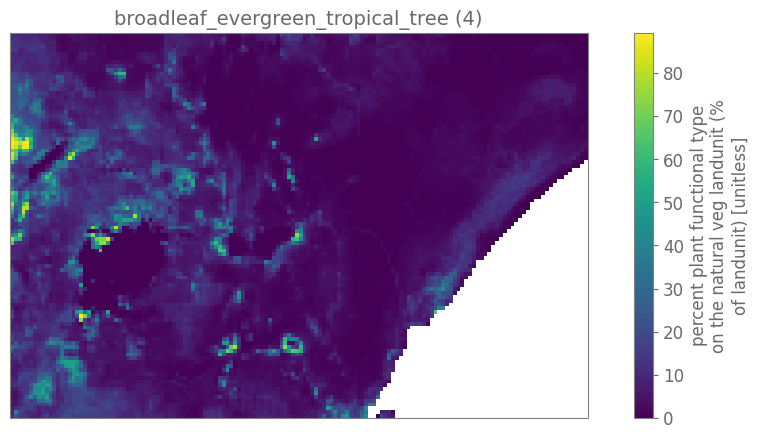

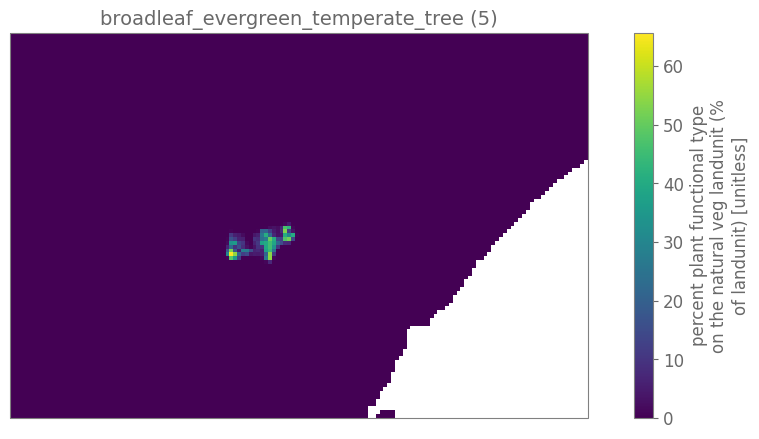

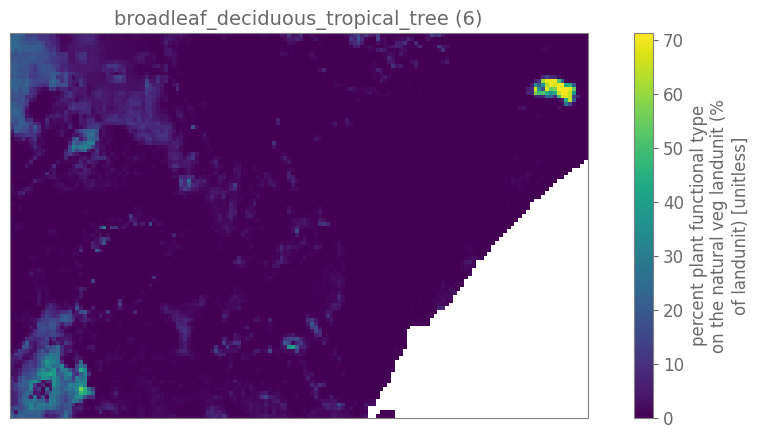

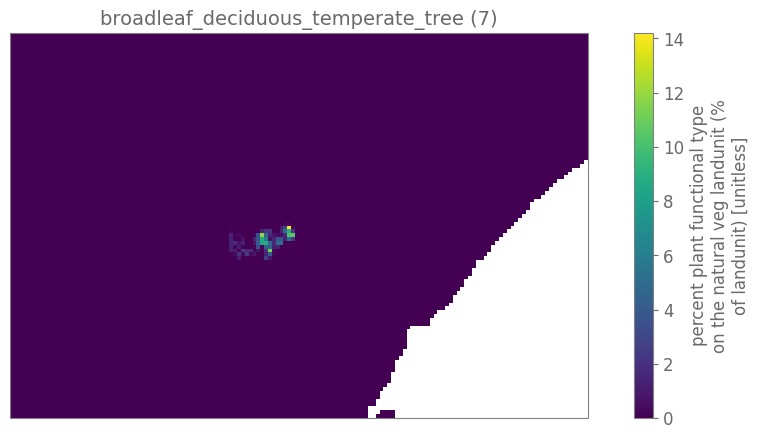

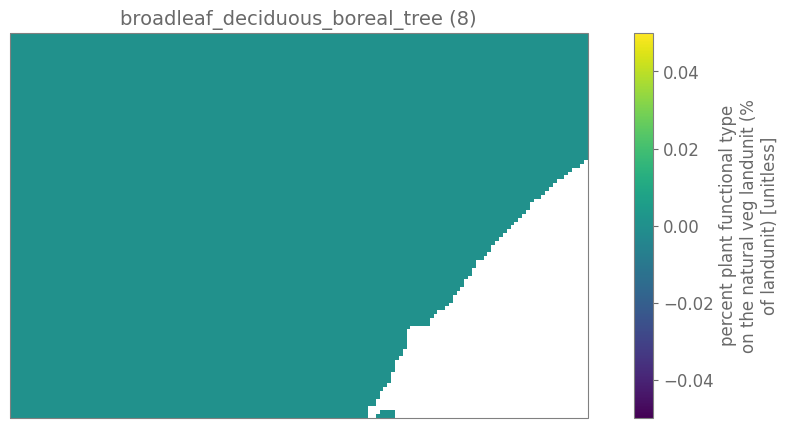

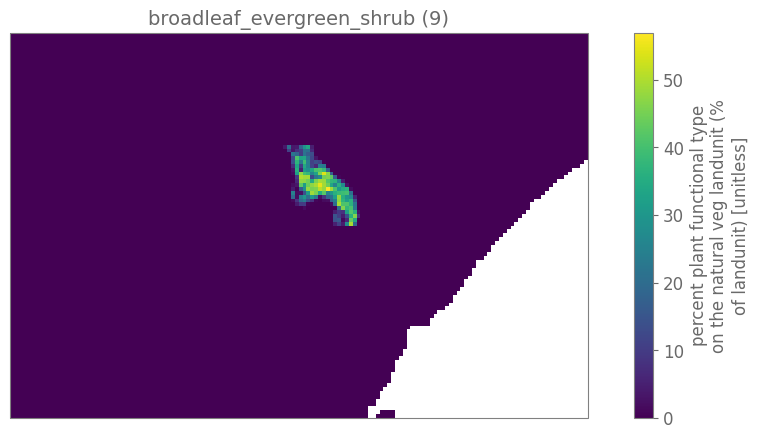

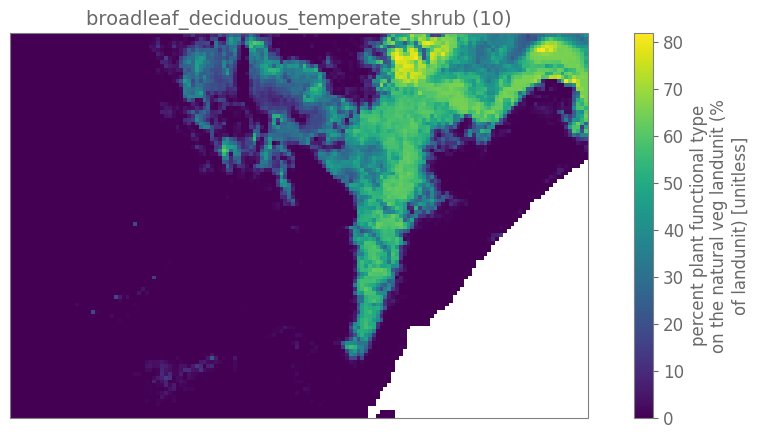

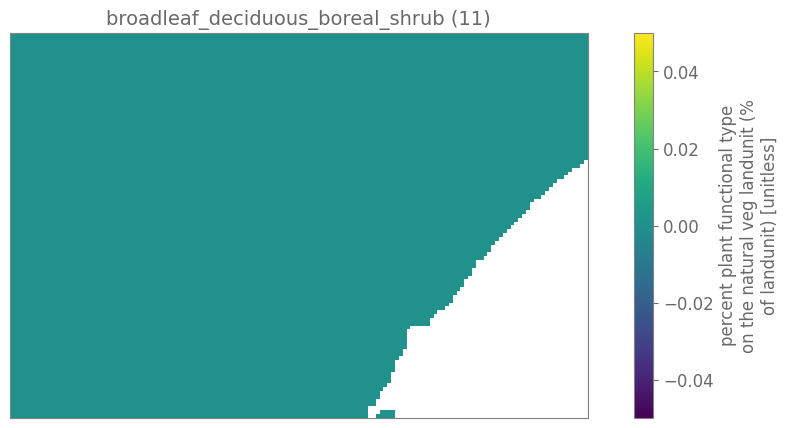

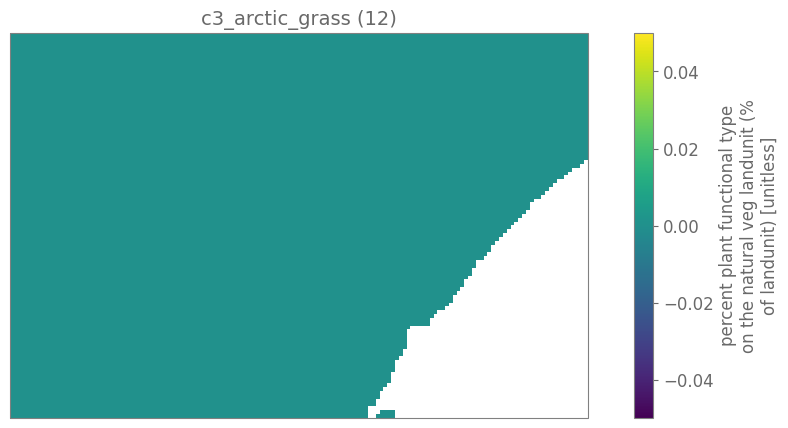

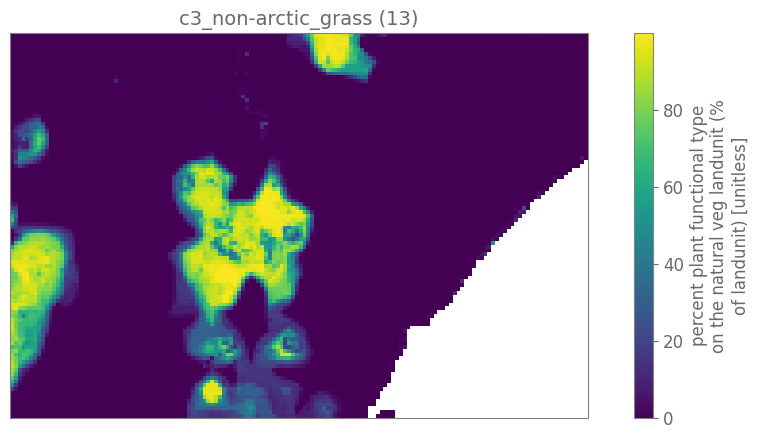

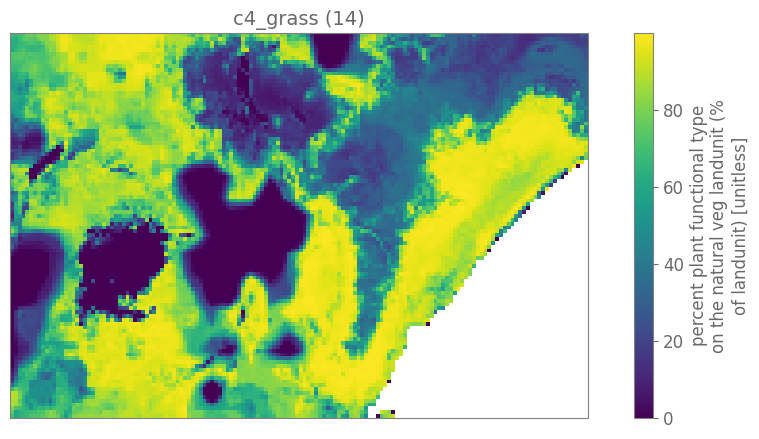

In [66]:
da = da_eastafrica['PCT_NAT_PFT'].where(landmask)

 
for i in da.natpft: 
    plt.figure(figsize=(12,5))
    proj=ccrs.UTM(37)
    ax = plt.subplot(111, projection=proj)
    da.sel(natpft=i).plot(ax=ax)
    ax.set_title(ivt_int2str(i)+' ('+str(i.values)+')')


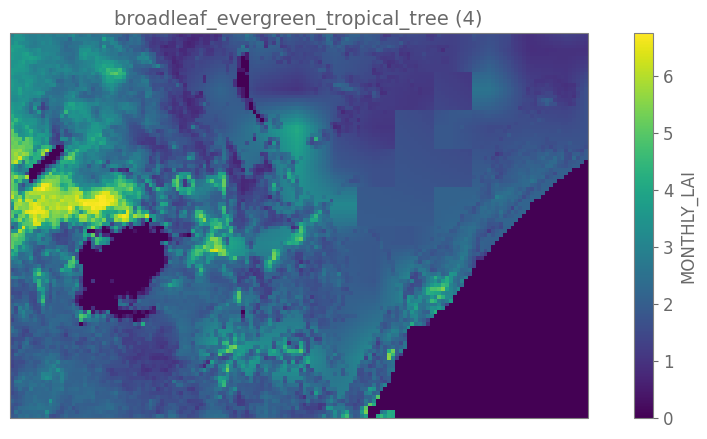

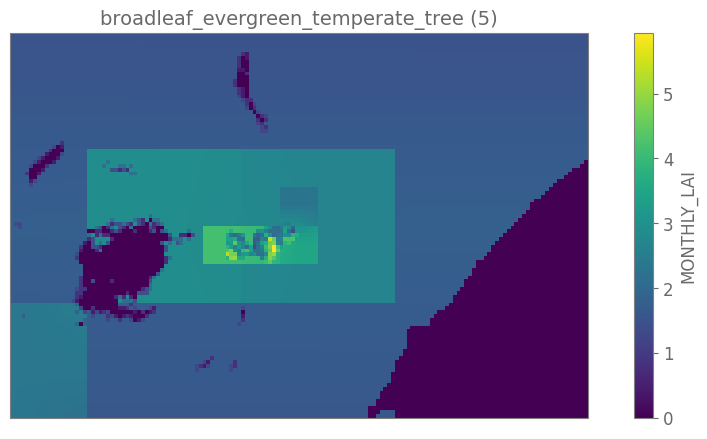

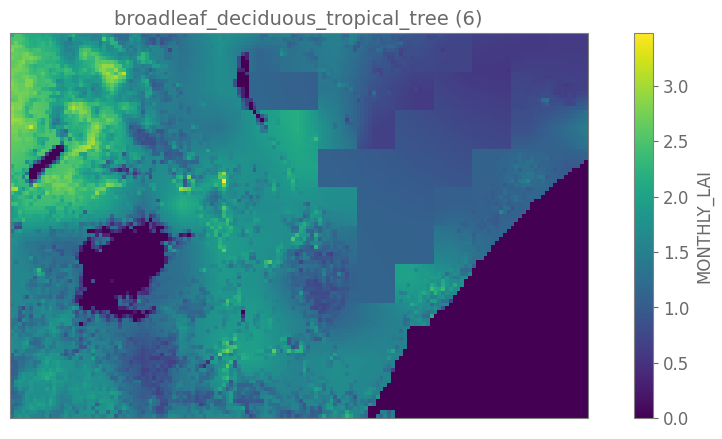

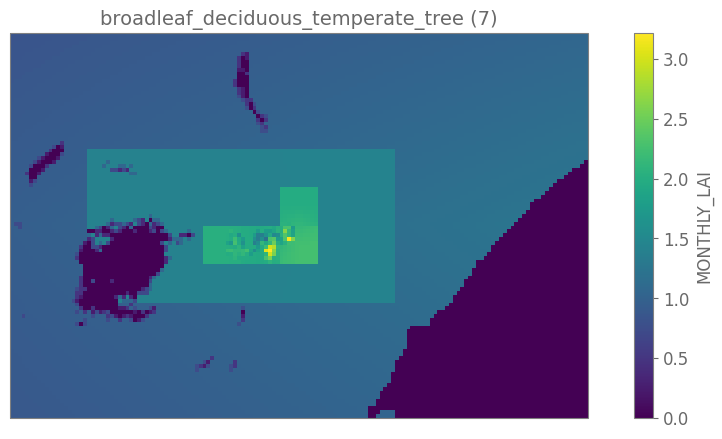

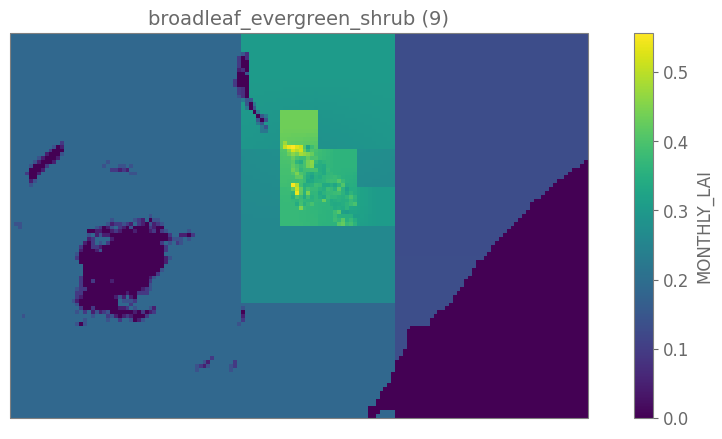

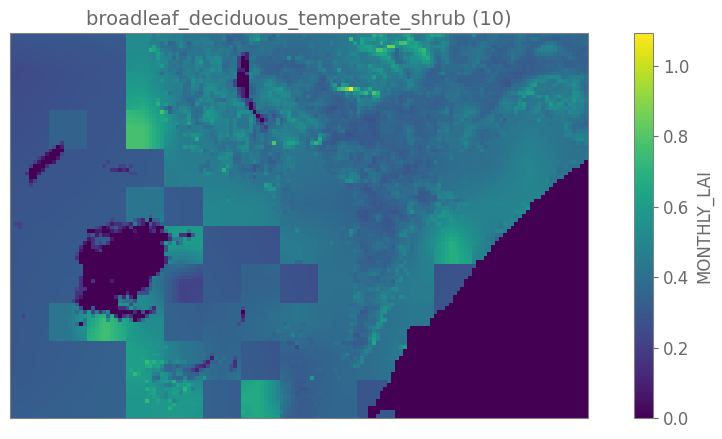

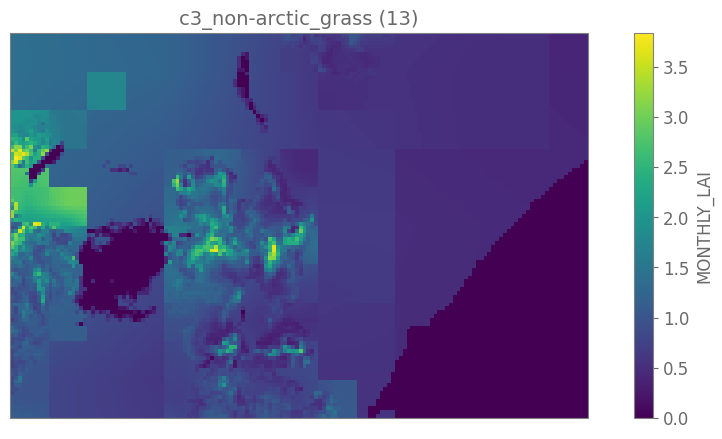

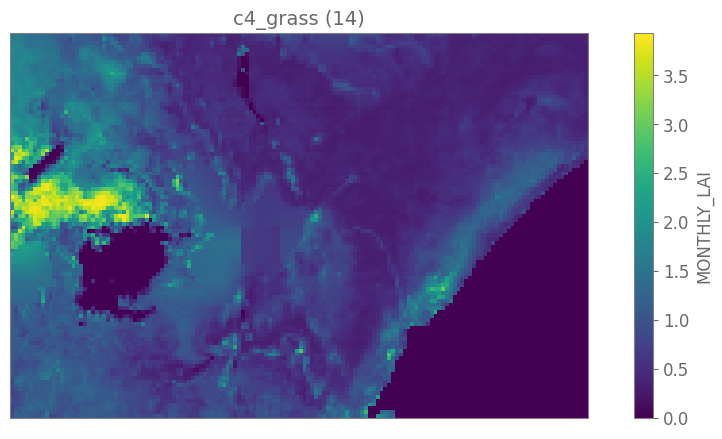

In [75]:
pfts_in_kenya = [4,5,6,7,9,10,13,14]

for i in pfts_in_kenya: 
    plt.figure(figsize=(12,5))
    proj=ccrs.UTM(37)
    ax = plt.subplot(111, projection=proj)
    da_eastafrica['MONTHLY_LAI'].mean('time').sel(lsmpft=i).plot(ax=ax)
    ax.set_title(ivt_int2str(i)+' ('+str(i)+')')



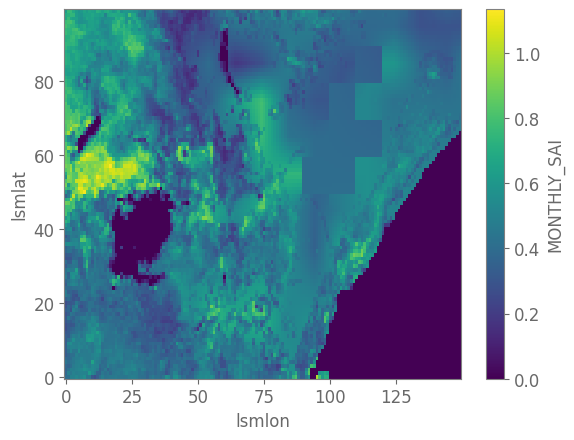

In [72]:
da_eastafrica['MONTHLY_SAI'].mean('time').sel(lsmpft=4).plot()